<h2><font color="#1D4089" size=8>Analisís exploratorío.</font><h2>
    
<br><br>
<div sytle="text-align: right">
<font color="#1D4089" size=3>Jaime Alberto Suarez Moctezuma.</font><br>
<font color="#1D4089" size=3>Analisis exploratorio de los salarios mínimos en México.</font><br>

El objetivo principal del análisis exploratorio inicial es obtener una comprensión básica y una visión general de los datos antes de realizar análisis más profundos o modelos predictivos.

In [1]:
#Importación de las librerias 

import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Obtener la ruta del archivo en función del directorio actual
current_directory = os.getcwd()
file_name = "Datos.csv"
file_path = os.path.join(current_directory, file_name)

In [3]:
# Carga de los datos limpiados anteriormente
salariomin = pd.read_csv(file_path)

In [4]:
# Muestra las primeras filas del DataFrame
print(salariomin.head())

  inicio_vigencia zona  salario_minimo_general  albanileria  archivista  \
0      01/01/2009    a                   54.80        79.87       76.35   
1      01/01/2009    b                   53.26        77.81       74.29   
2      01/01/2009    c                   51.95        75.71       72.24   
3      01/01/2010    a                   57.46        83.74       74.29   
4      01/01/2010    b                   55.84        81.58       74.29   

   boticas  buldozer  cajero  cajista  cantinero  ...  talabartero  tablajero  \
0    69.50     84.13   70.84    75.41      72.49  ...        74.47      74.47   
1    67.65     81.74   69.11    73.52      70.53  ...        72.47      72.47   
2    65.94     79.61   67.35    71.42      68.70  ...        70.46      70.46   
3    72.87     88.21   74.28    79.07      76.01  ...        78.08      78.08   
4    70.93     85.70   72.46    77.09      73.95  ...        75.98      75.98   

   tapicero_autos  tapicero_muebles  trabajador_hogar  trabaja

In [5]:
# Información estadísticas sobre todas las columnas numéricas
print(salariomin.describe())

       salario_minimo_general  albanileria  archivista     boticas  \
count               36.000000    36.000000   36.000000   36.000000   
mean                98.495000   122.180000   74.290278  110.749167   
std                 66.006823    58.358635    0.491240   60.066648   
min                 51.950000    75.710000   72.240000   65.940000   
25%                 59.080000    86.100000   74.290000   74.990000   
50%                 66.870000    97.450000   74.290000   84.840000   
75%                107.815000   126.060000   74.290000  110.152500   
max                312.410000   312.410000   76.350000  312.410000   

         buldozer      cajero    cajista   cantinero  carpintero_obra  \
count   36.000000   36.000000  36.000000   36.000000        36.000000   
mean   126.813889  112.308056  80.189167  114.036111       141.602500   
std     57.851816   59.782657   3.235388   59.537515        52.192689   
min     79.610000   67.350000  71.420000   68.700000        70.460000   
25% 

In [7]:
#Reasignación de la variable fecha por la variable año
salariomin['fecha'] = pd.to_datetime(salariomin['inicio_vigencia'], format='%d/%m/%Y')
salariomin['año'] = salariomin['fecha'].dt.year
print(salariomin['año'])

0     2009
1     2009
2     2009
3     2010
4     2010
5     2010
6     2011
7     2011
8     2011
9     2012
10    2012
11    2012
12    2012
13    2012
14    2013
15    2013
16    2014
17    2014
18    2015
19    2015
20    2015
21    2015
22    2015
23    2016
24    2017
25    2017
26    2019
27    2019
28    2020
29    2020
30    2021
31    2021
32    2022
33    2022
34    2023
35    2023
Name: año, dtype: int64


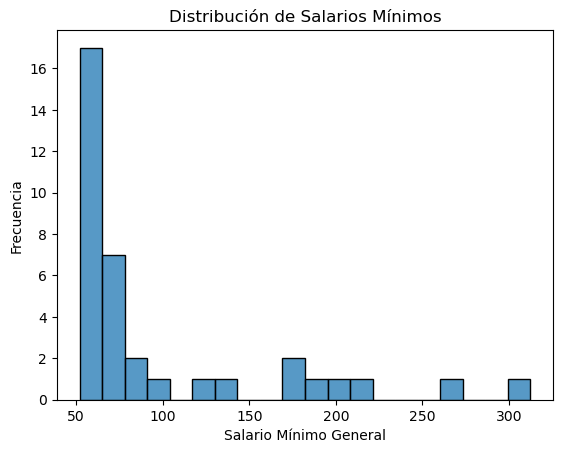

In [8]:
# Histograma para ver la distribución de los salarios mínimos

sns.histplot(salariomin['salario_minimo_general'], bins=20)
plt.xlabel('Salario Mínimo General')
plt.ylabel('Frecuencia')
plt.title('Distribución de Salarios Mínimos')
plt.show()

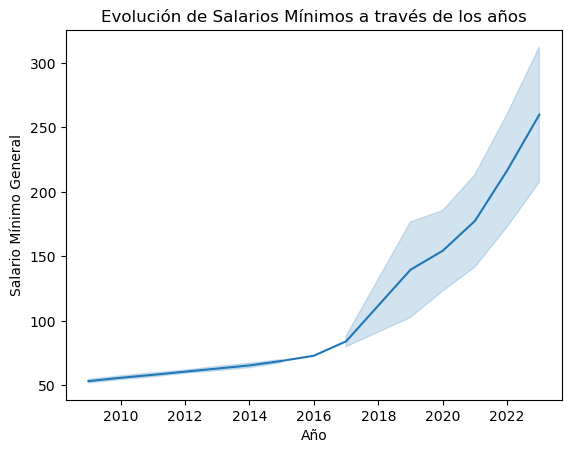

In [14]:
# Gráfico de líneas para ver la evolución de los salarios mínimos a lo largo de los años

sns.lineplot(data=salariomin, x='año', y='salario_minimo_general')
plt.xlabel('Año')
plt.ylabel('Salario Mínimo General')
plt.title('Evolución de Salarios Mínimos a través de los años')
plt.show()

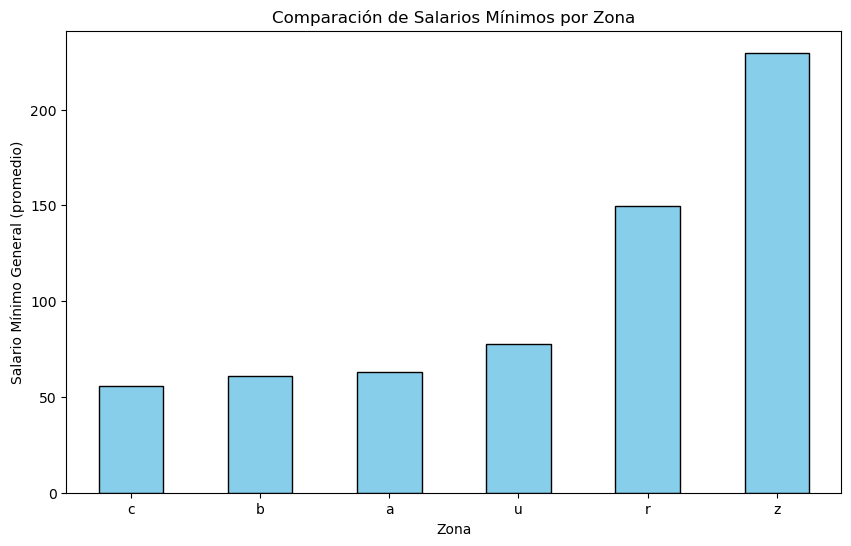

In [10]:
#Grafico de barras para compararar los salarios mínimos entre diferentes zonas (grupos)
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
salario_por_zona = salariomin.groupby('zona')['salario_minimo_general'].mean()
salario_por_zona = salario_por_zona.sort_values(ascending=True)
salario_por_zona.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Zona')
plt.ylabel('Salario Mínimo General (promedio)')
plt.title('Comparación de Salarios Mínimos por Zona')
plt.xticks(rotation=0)
plt.show()

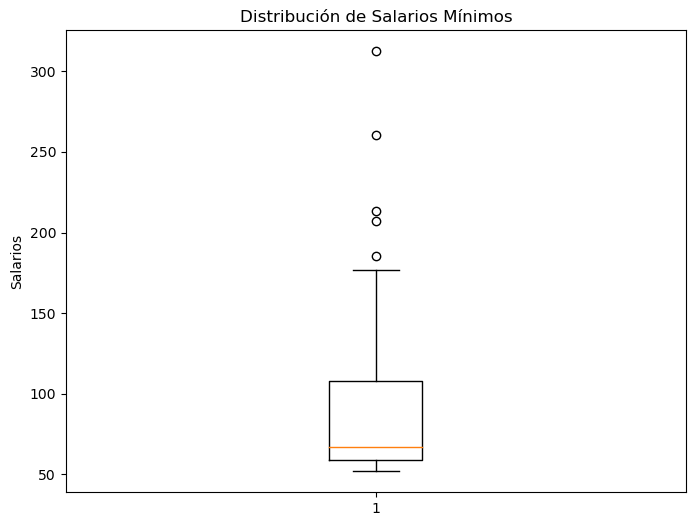

In [25]:
# Creación de un boxplot para visualizar la distribución de los salarios mínimos
plt.figure(figsize=(8, 6))  #Ajustamos el tamaño del gráfico
plt.boxplot(salariomin['salario_minimo_general'])  # 'salario_min_general' es el nombre de la columna que contiene los datos de salarios
plt.title('Distribución de Salarios Mínimos')
plt.ylabel('Salarios')
plt.show()

<h2><font color="#1D4089" size=5>Creación de un analisis de correlación</font></h2> 

El analisis de correlación nos ayuda a evaluar la relación o asociación entre dos o más variables en un conjunto de datos. Siendo su objetivo principal identificar la fuerza y dirección de la relación entre las variables y determinar si existe una conexión significativa entre ellas.

In [30]:
#Empleamos la función de cálculo de correlación para obtener una matriz de correlación.
correlation_matrix = salariomin.corr(numeric_only=True)

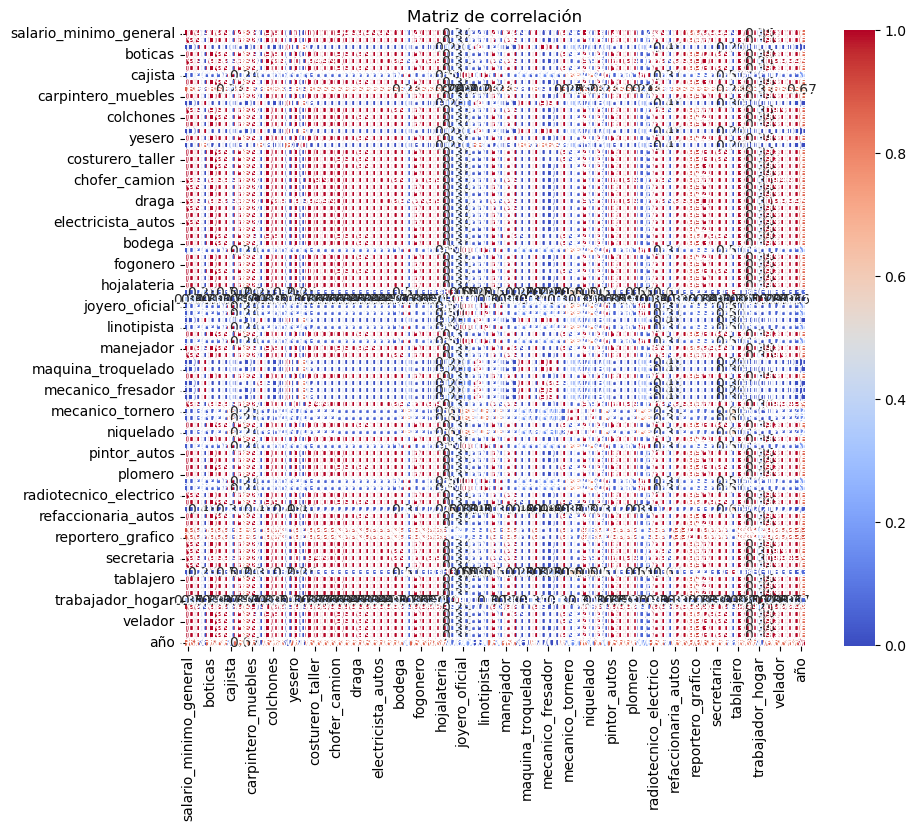

In [31]:
# mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))  # Opcional: Ajusta el tamaño del mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

In [13]:
# Calculamos la correlación que tienen "salario_minimo_general" con otras variables

correlation_salary_year = salariomin['salario_minimo_general'].corr(salariomin['año'])
correlation_salary_chofer_camion = salariomin['salario_minimo_general'].corr(salariomin['chofer_camion'])
correlation_salary_boticas = salariomin['salario_minimo_general'].corr(salariomin['boticas'])
correlation_salary_niquelado = salariomin['salario_minimo_general'].corr(salariomin['niquelado'])
correlation_salary_carpenter = salariomin['salario_minimo_general'].corr(salariomin['carpintero_muebles'])
correlation_salary_saddler = salariomin['salario_minimo_general'].corr(salariomin['talabartero'])

print(f"Correlación salario_minimo_general - año: {correlation_salary_year}")
print(f"Correlación salario_minimo_general - chofer_camion: {correlation_salary_chofer_camion}")
print(f"Correlación salario_minimo_general - boticas: {correlation_salary_boticas}")
print(f"Correlación salario_minimo_general - niquelado: {correlation_salary_niquelado}")
print(f"Correlación salario_minimo_general - carpintero_muebles: {correlation_salary_carpenter}")
print(f"Correlación salario_minimo_general - talabartero: {correlation_salary_saddler}")

Correlación salario_minimo_general - año: 0.8575997553066732
Correlación salario_minimo_general - chofer_camion: 0.9922291239912946
Correlación salario_minimo_general - boticas: 0.9982985196689335
Correlación salario_minimo_general - niquelado: 0.029789171751552528
Correlación salario_minimo_general - carpintero_muebles: 0.9951639809737051
Correlación salario_minimo_general - talabartero: 0.0181806143891994
